In [ ]:
import pandas as pd

In [ ]:
#Creating a series
s = pd.Series([2, 3, -1, 5])

In [ ]:
import numpy as np
np.exp(s)

0      7.389056
1     20.085537
2      0.367879
3    148.413159
dtype: float64

In [ ]:
s + [1000, 2000, 3000, 4000]

0    1002
1    2003
2    2999
3    4005
dtype: int64

In [ ]:
#Broadcasting
s + 1000

0    1002
1    1003
2     999
3    1005
dtype: int64

In [ ]:
#True or false
s < 0

0    False
1    False
2     True
3    False
dtype: bool

In [ ]:
#Index labels
s2 = pd.Series([68, 83, 112, 68], index = ['alice', 'bob', 'charles', 'darwin'])
print(s2)

alice       68
bob         83
charles    112
darwin      68
dtype: int64


In [ ]:
#You can then use the Series just like a dict
s2['bob']
#As array
print(s2[1])

83


In [ ]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [ ]:
surprise_slice = surprise[2:]
surprise_slice

2    1002
3    1003
dtype: int64

In [ ]:
try:
  surprise_slice[0]
except KeyError as e:
  print('Key error:', e)

Key error: 0


In [ ]:
surprise_slice.iloc[0]

1002

In [ ]:
weights = {
    'alice' : 68,
    'bob' : 83,
    'colin' : 86,
    'darwin' : 68
}

s3 = pd.Series(weights)
print(s3)


alice     68
bob       83
colin     86
darwin    68
dtype: int64


In [ ]:
s4 = pd.Series(weights, index = ['colin', 'alice'])
print(s4)

colin    86
alice    68
dtype: int64


In [ ]:
#Automatic alignment
print(s2.keys())
print(s3.keys())

s2 + s3

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64

In [ ]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

In [ ]:
#Init with a scalar
meaning = pd.Series(42, ['life', 'universe', 'everything'])
print(meaning)

life          42
universe      42
everything    42
dtype: int64


In [ ]:
#A series can have a name:
s6 = pd.Series([83, 68], index = ['bob', 'alice'], name='weights')
s6

bob      83
alice    68
Name: weights, dtype: int64

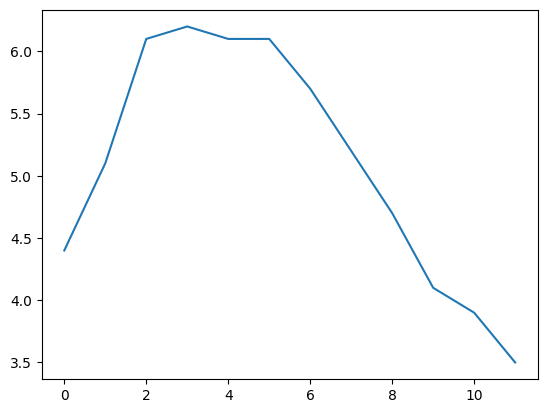

In [ ]:
#Plotting a series
import matplotlib.pyplot as plt
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()
plt.show()

In [ ]:
#Time range
dates = pd.date_range('2016/10/29 5:30pm', periods=12, freq='H')
dates

DatetimeIndex(['2016-10-29 17:30:00', '2016-10-29 18:30:00',
               '2016-10-29 19:30:00', '2016-10-29 20:30:00',
               '2016-10-29 21:30:00', '2016-10-29 22:30:00',
               '2016-10-29 23:30:00', '2016-10-30 00:30:00',
               '2016-10-30 01:30:00', '2016-10-30 02:30:00',
               '2016-10-30 03:30:00', '2016-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='H')

In [ ]:
temp_series = pd.Series(temperatures, dates)
temp_series

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: H, dtype: float64

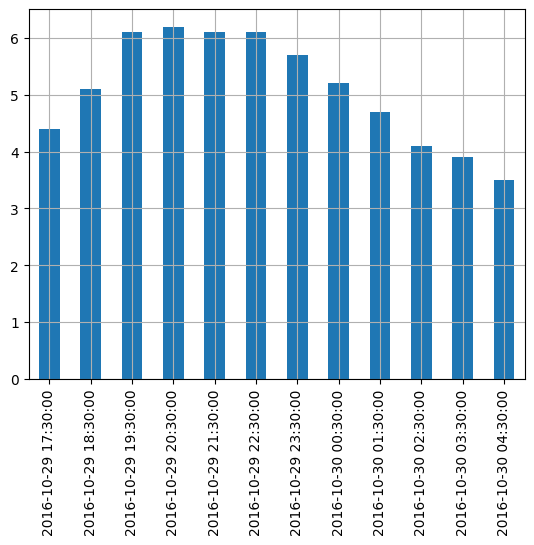

In [ ]:
#Lets plot series

temp_series.plot(kind='bar')

plt.grid(True)
plt.show()

In [ ]:
#Resampling
temp_series_freq_2H = temp_series.resample("2H")
temp_series_freq_2H

In [ ]:
temp_series_freq_2H = temp_series.resample("2H").min()
temp_series_freq_2H

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    6.1
2016-10-29 22:00:00    5.7
2016-10-30 00:00:00    4.7
2016-10-30 02:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: 2H, dtype: float64

In [ ]:
#Apply() method

temp_series_freq_2H = temp_series.resample('2H').apply(np.min)
temp_series_freq_2H

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    6.1
2016-10-29 22:00:00    5.7
2016-10-30 00:00:00    4.7
2016-10-30 02:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: 2H, dtype: float64

In [ ]:
temp_series_freq_15min = temp_series.resample('15Min').mean()
temp_series_freq_15min.head(n=10)

2016-10-29 17:30:00    4.4
2016-10-29 17:45:00    NaN
2016-10-29 18:00:00    NaN
2016-10-29 18:15:00    NaN
2016-10-29 18:30:00    5.1
2016-10-29 18:45:00    NaN
2016-10-29 19:00:00    NaN
2016-10-29 19:15:00    NaN
2016-10-29 19:30:00    6.1
2016-10-29 19:45:00    NaN
Freq: 15T, dtype: float64

In [ ]:
temp_series_freq_15min = temp_series.resample('15Min').interpolate(method='cubic')
temp_series_freq_15min.head(n=10)

2016-10-29 17:30:00    4.400000
2016-10-29 17:45:00    4.452911
2016-10-29 18:00:00    4.605113
2016-10-29 18:15:00    4.829758
2016-10-29 18:30:00    5.100000
2016-10-29 18:45:00    5.388992
2016-10-29 19:00:00    5.669887
2016-10-29 19:15:00    5.915839
2016-10-29 19:30:00    6.100000
2016-10-29 19:45:00    6.203621
Freq: 15T, dtype: float64

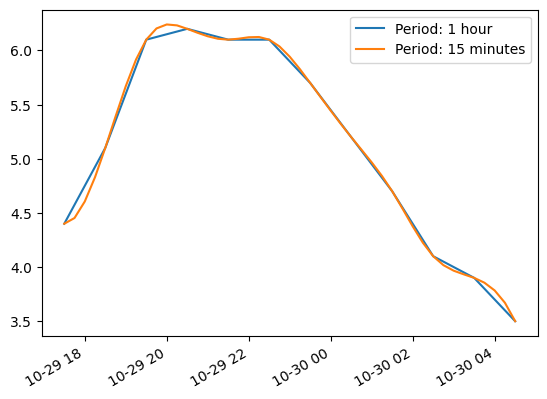

In [ ]:
temp_series.plot(label='Period: 1 hour')
temp_series_freq_15min.plot(label='Period: 15 minutes')
plt.legend()
plt.show()

In [ ]:
#Timezones
temp_series_ny = temp_series.tz_localize('America/New_York')
temp_series_ny

2016-10-29 17:30:00-04:00    4.4
2016-10-29 18:30:00-04:00    5.1
2016-10-29 19:30:00-04:00    6.1
2016-10-29 20:30:00-04:00    6.2
2016-10-29 21:30:00-04:00    6.1
2016-10-29 22:30:00-04:00    6.1
2016-10-29 23:30:00-04:00    5.7
2016-10-30 00:30:00-04:00    5.2
2016-10-30 01:30:00-04:00    4.7
2016-10-30 02:30:00-04:00    4.1
2016-10-30 03:30:00-04:00    3.9
2016-10-30 04:30:00-04:00    3.5
dtype: float64

In [ ]:
#We can convert these datetimes to Paris time like this:
temp_series_paris = temp_series_ny.tz_convert("Europe/Paris")
temp_series_paris

2016-10-29 23:30:00+02:00    4.4
2016-10-30 00:30:00+02:00    5.1
2016-10-30 01:30:00+02:00    6.1
2016-10-30 02:30:00+02:00    6.2
2016-10-30 02:30:00+01:00    6.1
2016-10-30 03:30:00+01:00    6.1
2016-10-30 04:30:00+01:00    5.7
2016-10-30 05:30:00+01:00    5.2
2016-10-30 06:30:00+01:00    4.7
2016-10-30 07:30:00+01:00    4.1
2016-10-30 08:30:00+01:00    3.9
2016-10-30 09:30:00+01:00    3.5
dtype: float64

In [ ]:
#Periods
#pd.period_range() The pd.period_range() function returns a PeriodIndex instead of a DatetimeIndex.
# For example, let's get all quarters in 2016 and 2017:

quarters = pd.period_range('2016Q1', periods=8, freq='Q')
quarters

PeriodIndex(['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
             '2017Q3', '2017Q4'],
            dtype='period[Q-DEC]')

In [ ]:
#Adding a number N to a PeriodIndex
quarters + 3

PeriodIndex(['2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1',
             '2018Q2', '2018Q3'],
            dtype='period[Q-DEC]')

In [ ]:
#DataFrame objects
#Creating a DataFrame

people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [ ]:
#Access columns
people['birthyear']


alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [ ]:
#Access multiple columns
people[['birthyear', 'hobby']]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


In [ ]:
d2 = pd.DataFrame(
        people_dict,
        columns=["birthyear", "weight", "height"],
        index=["bob", "alice", "eugene"]
     )
d2

,birthyear,weight,height
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


In [ ]:
values = [
    [1985, np.nan, 'Biking', 68],
    [1984, 3,      'Dancing', 83],
    [1992, 0,       np.nan,   112]
         ]

d3 = pd.DataFrame(
    values,
    columns=['birthyear', 'children', 'hobby', 'weight'],
    index=['alice', 'bob',' charles']
   )
print(d3)

          birthyear  children    hobby  weight
alice          1985       NaN   Biking      68
bob            1984       3.0  Dancing      83
 charles       1992       0.0      NaN     112


To specify missing values, you can use either np.nan or NumPy's masked arrays:

In [ ]:
masked_array = np.ma.asarray(values, dtype=object)
masked_array[(0, 2), (1, 2)] = np.ma.masked
d3 = pd.DataFrame(
      masked_array,
      columns=["birthyear", "children", "hobby", "weight"],
      index=["alice", "bob", "charles"]
    )
print(d3)

        birthyear children    hobby weight
alice        1985      NaN   Biking     68
bob          1984        3  Dancing     83
charles      1992        0      NaN    112


In [ ]:
#Instead of an ndarray, you can also pass a DataFrame object:
d4 = pd.DataFrame(
    d3,
    columns=['hobby', 'children'],
    index=['alice', 'bob']
)
d4

,hobby,children
alice,Biking,NaN
bob,Dancing,3


In [ ]:
d5 = pd.DataFrame(
  {
    ("public", "birthyear"):
        {("Paris","alice"): 1985, ("Paris","bob"): 1984, ("London","charles"): 1992},
    ("public", "hobby"):
        {("Paris","alice"): "Biking", ("Paris","bob"): "Dancing"},
    ("private", "weight"):
        {("Paris","alice"): 68, ("Paris","bob"): 83, ("London","charles"): 112},
    ("private", "children"):
        {("Paris", "alice"): np.nan, ("Paris","bob"): 3, ("London","charles"): 0}
  }
)
d5

public          private         
               birthyear    hobby  weight children
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0
London charles      1992      NaN     112      0.0

In [ ]:
d5


public          private         
               birthyear    hobby  weight children
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0
London charles      1992      NaN     112      0.0

In [ ]:
#Drop a column
d5.columns = d5.columns.droplevel(level = 0)
d5

birthyear    hobby  weight  children
Paris  alice         1985   Biking      68       NaN
       bob           1984  Dancing      83       3.0
London charles       1992      NaN     112       0.0

In [ ]:
#Transposing

d6 = d5.T
d6

Paris           London
            alice      bob charles
birthyear    1985     1984    1992
hobby      Biking  Dancing     NaN
weight         68       83     112
children      NaN      3.0     0.0

In [ ]:
#Stacking and unstacking levels
d7 = d6.stack()
d7


London    Paris
birthyear alice      NaN     1985
          bob        NaN     1984
          charles   1992      NaN
hobby     alice      NaN   Biking
          bob        NaN  Dancing
weight    alice      NaN       68
          bob        NaN       83
          charles    112      NaN
children  bob        NaN      3.0
          charles    0.0      NaN

In [ ]:
d8 = d7.unstack()
d8

London                Paris                 
           alice  bob charles   alice      bob charles
birthyear    NaN  NaN    1992    1985     1984     NaN
children     NaN  NaN     0.0     NaN      3.0     NaN
hobby        NaN  NaN     NaN  Biking  Dancing     NaN
weight       NaN  NaN     112      68       83     NaN

In [ ]:
d9 = d8.unstack()
d9

London  alice    birthyear        NaN
                 children         NaN
                 hobby            NaN
                 weight           NaN
        bob      birthyear        NaN
                 children         NaN
                 hobby            NaN
                 weight           NaN
        charles  birthyear       1992
                 children         0.0
                 hobby            NaN
                 weight           112
Paris   alice    birthyear       1985
                 children         NaN
                 hobby         Biking
                 weight            68
        bob      birthyear       1984
                 children         3.0
                 hobby        Dancing
                 weight            83
        charles  birthyear        NaN
                 children         NaN
                 hobby            NaN
                 weight           NaN
dtype: object

In [ ]:
#Accessing rows
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [ ]:
people.loc['charles']

weight        112
birthyear    1992
children      0.0
hobby         NaN
Name: charles, dtype: object

In [ ]:
#You can also access rows by integer location
#using the iloc attribute:

people.iloc[2]

weight        112
birthyear    1992
children      0.0
hobby         NaN
Name: charles, dtype: object

In [ ]:
#You can also get a slice of rows, and this returns a DataFrame object:
people.iloc[1:3]

,weight,birthyear,children,hobby
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [ ]:
people[np.array([True, False, True])]

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
charles,112,1992,0.0,NaN


In [ ]:
people[people['birthyear'] < 1990 ]

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing


In [ ]:
#Adding and removing columns
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [ ]:
people["age"] = 2018 - people["birthyear"]  # adds a new column "age"
people["over 30"] = people["age"] > 30      # adds another column "over 30"
birthyears = people.pop("birthyear")
del people["children"]

people

,weight,hobby,age,over 30
alice,68,Biking,33,True
bob,83,Dancing,34,True
charles,112,NaN,26,False


In [ ]:
birthyears

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [ ]:
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene": 1})  # alice is missing, eugene is ignored
people

,weight,hobby,age,over 30,pets
alice,68,Biking,33,True,NaN
bob,83,Dancing,34,True,0.0
charles,112,NaN,26,False,5.0


In [ ]:
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene": 1})  # alice is missing, eugene is ignored
people

,weight,hobby,age,over 30,pets
alice,68,Biking,33,True,NaN
bob,83,Dancing,34,True,0.0
charles,112,NaN,26,False,5.0


In [ ]:
people.insert(1, "height", [172, 181, 185])
people

,weight,height,hobby,age,over 30,pets
alice,68,172,Biking,33,True,NaN
bob,83,181,Dancing,34,True,0.0
charles,112,185,NaN,26,False,5.0


In [ ]:
people.assign(
    body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
    has_pets = people["pets"] > 0
)

,weight,height,hobby,age,over 30,pets,body_mass_index,has_pets
alice,68,172,Biking,33,True,NaN,22.985398,False
bob,83,181,Dancing,34,True,0.0,25.335002,False
charles,112,185,NaN,26,False,5.0,32.724617,True


In [ ]:
#Evaluating an expression
people.eval("weight / (height/100) ** 2 > 25")


alice      False
bob         True
charles     True
dtype: bool

In [ ]:
#Querying a DataFrame

people.query("age > 30 and pets == 0")

,weight,height,hobby,age,over 30,pets
bob,83,181,Dancing,34,True,0.0


In [ ]:
#Sorting a DataFrame
people.sort_index(ascending=False)

,weight,height,hobby,age,over 30,pets
charles,112,185,NaN,26,False,5.0
bob,83,181,Dancing,34,True,0.0
alice,68,172,Biking,33,True,NaN


In [ ]:
people.sort_values(by='age', inplace=True)
people

,weight,height,hobby,age,over 30,pets
charles,112,185,NaN,26,False,5.0
alice,68,172,Biking,33,True,NaN
bob,83,181,Dancing,34,True,0.0


In [ ]:
(people
     .assign(body_mass_index = lambda df: df["weight"] / (df["height"] / 100) ** 2)
     .assign(overweight = lambda df: df["body_mass_index"] > 25)
)
people.eval("weight / (height/100) ** 2 > 25")
overweight_threshold = 30
people.eval("overweight = body_mass_index > @overweight_threshold", inplace=True)
people

UndefinedVariableError: name 'body_mass_index' is not defined

In [ ]:
#Plotting a DataFrame

people.sort_values(by="body_mass_index", inplace=True)
people.plot(kind="line", x="body_mass_index", y=["height", "weight"])
plt.show()

KeyError: 'body_mass_index'

NameError: name 'plt' is not defined

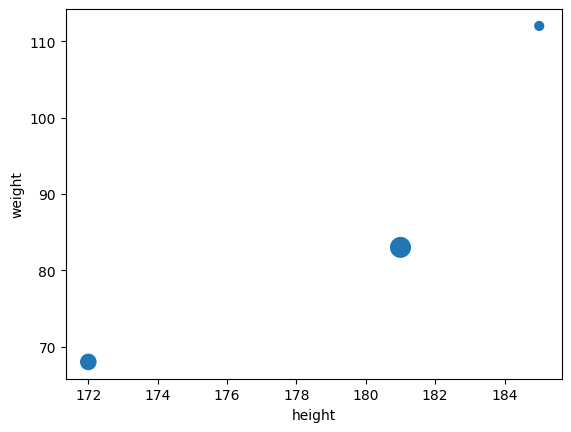

In [ ]:
people.plot(kind="scatter", x="height", y="weight", s=[40, 120, 200])
plt.show()

In [ ]:
#Operation on DataFrames
grades_array = np.array([[8, 8, 9], [10, 9, 9], [4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["sep", "oct", "nov"], index=["alice", "bob", "charles", "darwin"])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


In [ ]:
#Mathematical funtions on a DataFrame
np.sqrt(grades)

,sep,oct,nov
alice,2.828427,2.828427,3.000000
bob,3.162278,3.000000,3.000000
charles,2.000000,2.828427,1.414214
darwin,3.000000,3.162278,3.162278


In [ ]:
grades + 1

,sep,oct,nov
alice,9,9,10
bob,11,10,10
charles,5,9,3
darwin,10,11,11


In [ ]:
grades >= 5

,sep,oct,nov
alice,True,True,True
bob,True,True,True
charles,False,True,False
darwin,True,True,True


In [ ]:
grades.mean()

sep    7.75
oct    8.75
nov    7.50
dtype: float64

In [ ]:
(grades > 5).all(axis=1)

alice       True
bob         True
charles    False
darwin      True
dtype: bool

In [ ]:
grades - grades.mean()

,sep,oct,nov
alice,0.25,-0.75,1.5
bob,2.25,0.25,1.5
charles,-3.75,-0.75,-5.5
darwin,1.25,1.25,2.5


In [ ]:
#Handling missing data
bonus_array = np.array([[0, np.nan, 2], [np.nan, 1, 0], [0, 1, 0], [3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array, columns=["oct", "nov", "dec"], index=["bob", "colin", "darwin", "charles"])
bonus_points
(grades + bonus_points).fillna(0)

,dec,nov,oct,sep
alice,0.0,0.0,0.0,0.0
bob,0.0,0.0,9.0,0.0
charles,0.0,5.0,11.0,0.0
colin,0.0,0.0,0.0,0.0
darwin,0.0,11.0,10.0,0.0


In [ ]:
fixed_bonus_points = bonus_points.fillna(0)
fixed_bonus_points.insert(0, "sep", 0)
fixed_bonus_points.loc["alice"] = 0
grades + fixed_bonus_points

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,9.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0
